In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
values = pd.read_csv('/Users/erikstorrs/Downloads/HT704B1_regions_bundle/HT704B1_region_values.txt', sep='\t')
values

,region_id,score,sid,case,label
0,HT704B1-S1H3Fp1U1_1,0.005402,HT704B1-S1H3Fp1U1,HT704B1,1
1,HT704B1-S1H3Fp1U1_2,0.004488,HT704B1-S1H3Fp1U1,HT704B1,2
2,HT704B1-S1H3Fp1U1_4,0.019564,HT704B1-S1H3Fp1U1,HT704B1,4
3,HT704B1-S1H3Fp1U1_11,0.004960,HT704B1-S1H3Fp1U1,HT704B1,11
4,HT704B1-S1H3Fp1U1_12,0.029069,HT704B1-S1H3Fp1U1,HT704B1,12
...,...,...,...,...,...
6021,HT704B1-S1H3Fp1U50_4143,0.000000,HT704B1-S1H3Fp1U50,HT704B1,4143
6022,HT704B1-S1H3Fp1U50_4148,0.000079,HT704B1-S1H3Fp1U50,HT704B1,4148
6023,HT704B1-S1H3Fp1U50_4149,0.000711,HT704B1-S1H3Fp1U50,HT704B1,4149
6024,HT704B1-S1H3Fp1U50_4178,0.000266,HT704B1-S1H3Fp1U50,HT704B1,4178


In [5]:
sid = 'HT704B1-S1H3Fp1U1'
labeled = np.load(f'/Users/erikstorrs/Downloads/HT704B1_regions_bundle/{sid}_epi_region_labeled.npy')
labeled.shape, labeled.dtype

((726, 907), dtype('int32'))

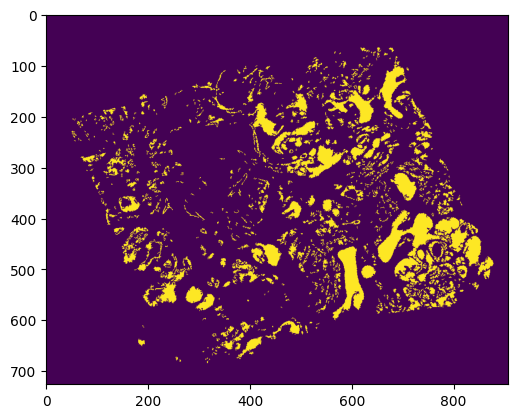

In [6]:
plt.imshow(labeled > 0)

In [8]:
filtered = values[values['sid']==sid]
filtered

,region_id,score,sid,case,label
0,HT704B1-S1H3Fp1U1_1,0.005402,HT704B1-S1H3Fp1U1,HT704B1,1
1,HT704B1-S1H3Fp1U1_2,0.004488,HT704B1-S1H3Fp1U1,HT704B1,2
2,HT704B1-S1H3Fp1U1_4,0.019564,HT704B1-S1H3Fp1U1,HT704B1,4
3,HT704B1-S1H3Fp1U1_11,0.004960,HT704B1-S1H3Fp1U1,HT704B1,11
4,HT704B1-S1H3Fp1U1_12,0.029069,HT704B1-S1H3Fp1U1,HT704B1,12
...,...,...,...,...,...
1175,HT704B1-S1H3Fp1U1_2917,0.000000,HT704B1-S1H3Fp1U1,HT704B1,2917
1176,HT704B1-S1H3Fp1U1_2920,0.000233,HT704B1-S1H3Fp1U1,HT704B1,2920
1177,HT704B1-S1H3Fp1U1_2921,0.000000,HT704B1-S1H3Fp1U1,HT704B1,2921
1178,HT704B1-S1H3Fp1U1_2925,0.000203,HT704B1-S1H3Fp1U1,HT704B1,2925


In [9]:
scores = np.zeros_like(labeled, dtype=np.float32)
for i, row in filtered.iterrows():
    mask = labeled == row['label']
    scores[mask] = row['score']
scores.shape

(726, 907)

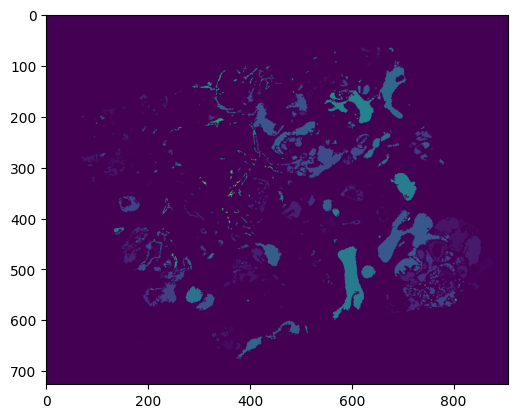

In [10]:
plt.imshow(scores)